## Calculating lifts and brand associations between various car brands 

Submitted by: Charvi Mittal, Monika Lodha, Ashwin Paramasivan, Rajat Malhotra, Arjun Adapalli

## Web Scraper

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
driver = webdriver.Chrome()

In [ ]:
import pandas as pd
df = pd.DataFrame()

In [ ]:
for i in range(1,80):
    url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"    
    url = url + '/p' + str(i)
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html,"lxml")
    userid = [soup.find_all(class_= 'Username')[j+1].get_text().lstrip().rstrip() for j in range(0,len(soup.find_all(class_ = 'Message')))]
    date = [soup.find_all(class_= 'MItem DateCreated')[j].get_text().lstrip().rstrip() for j in range(0,len(soup.find_all(class_ = 'Message')))]
    post = [soup.find_all(class_= 'Message')[j].get_text().lstrip().rstrip() for j in range(0,len(soup.find_all(class_ = 'Message')))]
    d = {'userid': userid, 'date': date, 'post': post}
    test = pd.DataFrame(data=d)
    df = df.append(test)

In [ ]:
df.to_csv('datadf.to_csv('data_ratings_last.csv')_ratings_last.csv')

## PART A & B

In [30]:
#creating a dictionary of models and brands
#the file used for creating the dictionary of models and brands is a modified version of the file provided(500 odd models) with around 2000 different models
import csv
reader = csv.reader(open('E:/Coursework/Text Analytics/Assignments/Assignment 2/Cars make model list.csv', 'r'))
d = {}
for k, v in reader:
   d[k] = v
d['excels'] = 'excels'
d['nissan quest ']='nissan quest '
d['quest ']='quest '
d['volvo t5 ']='volvo t5 '
d['excel ']='excel '
d['volvo t5-']='volvo t5-'

In [31]:
#reading in the posts and converting themto lowercase
from pandas import Series, DataFrame
import pandas as pd
import re

car_data = pd.read_csv('E:/Coursework/Text Analytics/Assignments/Assignment 2/Car_ratings.csv',encoding = "ISO-8859-1")

car_data['post']=car_data['post'].str.lower()
car_data['post']=car_data['post'].astype(str)

In [32]:
import nltk
from nltk import word_tokenize

In [33]:
#defining a regex pattern which would identify all the instances of the keys that are part of our dictionary 
from collections import OrderedDict
pattern = re.compile(r'\b(' + '|'.join(d.keys()) + r')\b')
words={}

#replacing all the model names with brand names
for i in range(7485):
    car_data['post'][i] = pattern.sub(lambda x: d[x.group()], car_data['post'][i])
    
#tokenizing these posts for lift calculationsin the future
tokenized_posts_replaced=car_data['post'].map(nltk.word_tokenize)    

#dropping duplicates of all the words in the replaced posts so that we don't count the samebrand twice in the same post  
for i in range(7485):    
    words = re.findall(r"\w+",car_data['post'][i])
    car_data['post'][i]= set(words)

In [34]:
#defining a vocabulary of brand names
vocab=["acura",
"audi",
"bmw",
"buick",
"cadillac",
"chevrolet",
"chrysler",
"dodge",
"ford",
"honda",
"hyndai kia",
"hyundai",
"infiniti",
"jaguar",
"kia",
"lexus",
"lincoln",
"mazda",
"mercedes",
"mercury",
"mitsubishi",
"nissan",
"pontiac",
"problem",
"saturn",
"subaru",
"suzuki",
"toyata",
"toyota",
"volkswagen",
"volvo",
"mercedes benz",
"mercedes-benz",
"land rover",
"lotus",
"lamborghini",
"porsche",
"plymouth",
"eagle",
"alfa romeo",
"daihatsu",
"geo",
"gmc",
"isuzu",
"jeep",
"oldsmobile",
"citroën",
"hillman",
"austin",
"fillmore",
"fairthorpe",
"studebaker",
"rambler",
"jensen",
"shelby",
"mg",
"renault",
"maserati",
"saab",
"merkur",
"holden",
"hummer",
"daewoo",
"corbin",
"mini",
"spyker",
"scion",
"maybach",
"aston martin",
"ferrari",
"spyker cars",
"bentley",
"panoz",
"rolls-royce",
"morgan",
"aptera",
"smart",
"bugatti",
"tesla",
"fiat",
"mclaren",
"ram",
"peugeot",
"foose"
]

In [35]:
#counting the total number of unique occurrances of brands in all the posts
wordcount = dict((x,0) for x in vocab)
for i in range(7485):
    for w in car_data['post'][i]:
        if w in wordcount:
            wordcount[w] += 1
s = pd.Series(wordcount, name='frequency')
s.index.name = 'brand'
test=s.sort_values(ascending=False).reset_index()
top10brands=test['brand'][0:10]
brandsE=test['brand'][0:10]
test[0:10]

,brand,frequency
0,infiniti,5631
1,lexus,4830
2,bmw,3708
3,acura,1727
4,audi,1057
5,honda,678
6,cadillac,598
7,ford,471
8,nissan,418
9,toyota,392


In [36]:
liftdata = pd.DataFrame(index = top10brands, columns = top10brands)

In [37]:
def cooccurrance(brand1, brand2, postlist):
    count = 0
    for comment in postlist:
        if comment.count(brand1)!= 0 and comment.count(brand2)!= 0:
            count += 1
    return count

In [38]:
def occurrance(brand, postlist):
    count = 0
    for comment in postlist:
        if comment.count(brand)!= 0:
            count += 1
    return count

In [39]:
def liftratio(brand1, brand2, postlist):
    num = cooccurrance(brand1, brand2, postlist)*len(postlist)
    denom = occurrance(brand1, postlist)*occurrance(brand2, postlist)
    lift = float(num)/denom
    return lift

In [40]:
for everybrand in top10brands:
    top_ = [brand for brand in top10brands if brand != everybrand]
    for j in range(len(top_)+1):
        liftdata[top10brands[j]].loc[everybrand] = liftratio(top10brands[j], everybrand, tokenized_posts_replaced)
        
        
liftdata[everybrand].loc[top10brands[j]] = liftdata[top10brands[j]][everybrand]
liftdata

brand,infiniti,lexus,bmw,acura,audi,honda,cadillac,ford,nissan,toyota
brand,,,,,,,,,,
infiniti,1.37744,1.0938,1.12304,1.14592,1.17575,1.14386,1.18587,1.17161,1.22439,1.04747
lexus,1.0938,1.56003,1.19925,1.24102,1.22332,1.22874,1.21909,1.21574,1.24881,1.2993
bmw,1.12304,1.19925,2.38756,1.19233,1.42684,1.26756,1.38088,1.21848,1.16966,1.27026
acura,1.14592,1.24102,1.19233,4.54187,1.39409,1.90744,1.69443,1.1172,1.59424,1.22719
audi,1.17575,1.22332,1.42684,1.39409,8.11822,1.47955,2.09676,1.69829,1.39404,1.53771
honda,1.14386,1.22874,1.26756,1.90744,1.47955,11.8621,1.44021,2.07246,3.68445,4.92328
cadillac,1.18587,1.21909,1.38088,1.69443,2.09676,1.44021,16.5232,1.51937,1.12658,1.15064
ford,1.17161,1.21574,1.21848,1.1172,1.69829,2.07246,1.51937,17.2069,1.43391,2.49236
nissan,1.22439,1.24881,1.16966,1.59424,1.39404,3.68445,1.12658,1.43391,18.9015,4.42264


In [41]:
#setting a threshold value for the lift value
lift_threshold=1/liftdata
(lift_threshold > .75)

brand,infiniti,lexus,bmw,acura,audi,honda,cadillac,ford,nissan,toyota
brand,,,,,,,,,,
infiniti,False,True,True,True,True,True,True,True,True,True
lexus,True,False,True,True,True,True,True,True,True,True
bmw,True,True,False,True,False,True,False,True,True,True
acura,True,True,True,False,False,False,False,True,False,True
audi,True,True,False,False,False,False,False,False,False,False
honda,True,True,True,False,False,False,False,False,False,False
cadillac,True,True,False,False,False,False,False,False,True,True
ford,True,True,True,True,False,False,False,False,False,False
nissan,True,True,True,False,False,False,True,False,False,False


In [42]:
(lift_threshold > .75).values

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True, False,  True, False,  True, False,  True,  True,
         True],
       [ True,  True,  True, False, False, False, False,  True, False,
         True],
       [ True,  True, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True, False, False, False, False, False, False,
        False],
       [ True,  True, False, False, False, False, False, False,  True,
         True],
       [ True,  True,  True,  True, False, False, False, False, False,
        False],
       [ True,  True,  True, False, False, False,  True, False, False,
        False],
       [ True,  True,  True,  True, False, False,  True, False, False,
        False]], dtype=bool)

In [43]:
import numpy as np
from sklearn.manifold import MDS
mds = MDS(n_components=2,random_state=15)
embed2d=mds.fit(lift_threshold.astype(np.float32)).embedding_
x=embed2d[:, 0]
y=embed2d[:, 1]

E:\Software\Anaconda2\envs\py36\lib\site-packages\sklearn\manifold\mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


E:\Software\Anaconda2\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


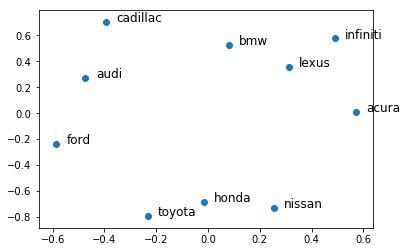

In [44]:
%pylab inline
plt.scatter(x,y)


for i in range(len(top10brands)):
    plt.annotate(top10brands[i],(x[i]+0.04,y[i]),fontsize=12)
    
plt.show()

## PART C & D

In [16]:
#reading in the posts and converting them to lowercase and string
from pandas import Series, DataFrame
import pandas as pd
import re

car_data = pd.read_csv('E:/Coursework/Text Analytics/Assignments/Assignment 2/Car_ratings.csv',encoding = "ISO-8859-1")

car_data['post']=car_data['post'].str.lower()
car_data['post']=car_data['post'].astype(str)

In [17]:
import nltk
from nltk import word_tokenize

In [18]:
#defining a regex pattern which would identify all the instances of the keys that are part of our dictionary 
from collections import OrderedDict
pattern = re.compile(r'\b(' + '|'.join(d.keys()) + r')\b')
words={}

#replacing all the model names with brand names
for i in range(7485):
    car_data['post'][i] = pattern.sub(lambda x: d[x.group()], car_data['post'][i])
    
#tokenizing these posts for lift calculationsin the future
tokenized_posts_replaced=car_data['post'].map(nltk.word_tokenize)    

#dropping duplicates of all the words in the replaced posts so that we don't count the samebrand twice in the same post  
for i in range(7485):    
    words = re.findall(r"\w+",car_data['post'][i])
    car_data['post'][i]= set(words)

In [19]:
# replacing attributes with synonyms
def replace(s):
    for (i,item) in enumerate(s):
        if(item=="engine" or item=='engines' or item=='power' or item=='acceleration' or item=='quality'
            or item=='sport' or item=='miles' or item=='torque' or item=='mileage'
            or item=='speed' or item=='sports'  or item=='weight' or item=='suspension'):
            s[i] = 'performance'
        elif(item=='awd' or item=='rwd' or item=='fwd' or item=='wheel' or item=='wheels'):
            s[i] ='wd'
        elif(item=='manual'or item=='auto'or item=='automatic'or item=='automatics'or item=='transmission'):
            s[i] ='trans'
        elif(item=='cheap'or item=='cheaper'or item=='costs'or item=='cost'or item=='economy'or item=='value'):
            s[i] ='price'
        elif(item=='luxury'or item=='interior'or item=='leather'or item=='brand'or item=='premium'
             or item=='seats'or item=='looks'or item=='seat'):
            s[i] ='class'

In [20]:
tokenized_posts_replaced.map(replace)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
7455    None
7456    None
7457    None
7458    None
7459    None
7460    None
7461    None
7462    None
7463    None
7464    None
7465    None
7466    None
7467    None
7468    None
7469    None
7470    None
7471    None
7472    None
7473    None
7474    None
7475    None
7476    None
7477    None
7478    None
7479    None
7480    None
7481    None
7482    None
7483    None
7484    None
Name: post, Length: 7485, dtype: object

In [21]:
flat_list=[item for sublist in tokenized_posts_replaced for item in sublist]
from collections import Counter
flat_list=Counter(flat_list)
flat_list

Counter({'entry': 356,
         'level': 360,
         'performance': 6748,
         'class': 4416,
         'sedan': 1529,
         'are': 4680,
         'a': 18572,
         'hot': 67,
         'area': 137,
         'for': 7084,
         'car': 8040,
         'manufacturers': 124,
         'and': 15929,
         'enthusiasts': 78,
         'alike': 10,
         '.': 32976,
         'these': 789,
         'show': 150,
         'their': 1300,
         'by': 1330,
         'being': 541,
         'fun': 436,
         'to': 15068,
         'drive': 1352,
         'handling': 712,
         'well': 1112,
         'they': 3364,
         'offering': 53,
         'some': 1369,
         'of': 10580,
         'the': 39997,
         'important': 174,
         'creatures': 1,
         'comforts': 8,
         'found': 207,
         'in': 10087,
         'most': 1032,
         'luxurious': 86,
         'upscale': 39,
         'selection': 11,
         'vehicles': 301,
         'that': 9682,
        

In [22]:
#counting the total number of unique occurrances of brands in all the posts
wordcount = dict((x,0) for x in vocab)
for i in range(7485):
    for w in car_data['post'][i]:
        if w in wordcount:
            wordcount[w] += 1
s = pd.Series(wordcount, name='frequency')
s.index.name = 'brand'
test=s.sort_values(ascending=False).reset_index()
top5brands=test['brand'][0:5]
test[0:5]

,brand,frequency
0,infiniti,5631
1,lexus,4830
2,bmw,3708
3,acura,1727
4,audi,1057


In [23]:
flat5 = dict((k,flat_list[k]) for k in ('performance','wd','trans','price','class'))
flat5

{'class': 4416, 'performance': 6748, 'price': 2144, 'trans': 2004, 'wd': 2617}

In [24]:
s = pd.Series(flat5, name='freq')
s.index.name = 'attribute'
attr=s.sort_values(ascending=False).reset_index()
attr

,attribute,freq
0,performance,6748
1,class,4416
2,wd,2617
3,price,2144
4,trans,2004


In [25]:
top5attri= attr['attribute'][0:5]
liftdata = pd.DataFrame(index = top5brands, columns = top5attri)

In [26]:
def twobrandcount(brand1, brand2, clist):
    count = 0
    for eachcomment in clist:
        for i in brand2:
            if eachcomment.count(brand1) != 0 and eachcomment.count(i) != 0:
                count += 1
    return count

def singlebrandcount(brand, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand) != 0:
            count += 1
    return count

def liftratio(brand1, brand2, clist):
    numerator = twobrandcount(brand1, brand2, clist)*len(clist)
    denominator = singlebrandcount(brand1, clist)*singlebrandcount(brand2, clist)
    lift = float(numerator)/denominator
    return lift

for everybrand in top5brands:
    top_ = [brand for brand in top5brands if brand != everybrand]
    for j in range(len(top_)+1):
        liftdata[top5attri[j]].loc[everybrand] = liftratio(top5attri[j], everybrand, tokenized_posts_replaced)
liftdata

attribute,performance,class,wd,price,trans
brand,,,,,
infiniti,0.0361126,0.0295257,0.0304126,0.0309769,0.0399257
lexus,0.0918912,0.109042,0.104767,0.116943,0.11466
bmw,0.0195102,0.0122382,0.0109823,0.0196875,0.0148296
acura,8.11258,8.0869,8.08929,8.2564,8.4255
audi,7.24476,7.10817,7.17719,7.27841,7.53835


## PART E

E:\Software\Anaconda2\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
E:\Software\Anaconda2\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
E:\Software\Anaconda2\envs\py36\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
E:\Software\Anaconda2\envs\py36\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

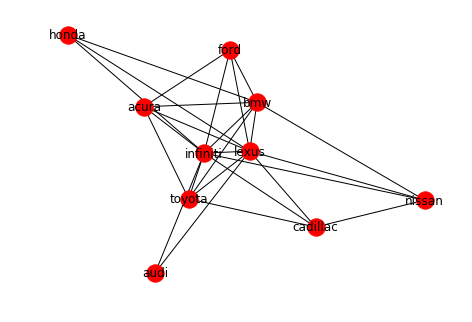

In [45]:
#setting a threshold value for the lift value
lift_threshold=1/liftdata

liftdata2 = pd.DataFrame(index = brandsE, columns = brandsE)

for everybrand in brandsE:
    top_ = [brand for brand in brandsE if brand != everybrand]
    for j in range(len(top_)+1):
        liftdata[brandsE[j]].loc[everybrand] = liftratio(brandsE[j], everybrand, tokenized_posts_replaced)
        
liftdata2[everybrand].loc[brandsE[j]] = liftdata2[brandsE[j]][everybrand]

#setting a threshold value for the lift value
lift_threshold=1/liftdata
(lift_threshold > .75)

brands = list(lift_threshold.columns.values)
edges = []
for i,s in enumerate(brands):
    for d in range(9-i):
        if lift_threshold.iloc[i,(d+1)*-1] > .75:
            edges.append((s,brands[(d+1)*-1]))
weights = []
for i in range(10):
    for a in range(9-i):
        weights.append(lift_threshold.iloc[i,(a+1)*-1]*100)
        
import networkx as nx
G=nx.Graph()
G.add_nodes_from(brands)
G.add_edges_from(edges)

nx.draw(G, with_labels=True)